# Cinématique des fluides

**Marc BUFFAT**, dpt mécanique Lyon 1


In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size='14')
from IPython.display import display
import sympy as sp
import sympy.vector as sv
sp.init_printing()

In [30]:
# bibliothéque de tracé de champ basé sur matplotlib
from validation.Champs import trace_isovaleur, trace_isocol, trace_vecteur, trace_lignes, trajectoire

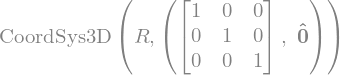

In [31]:
# système de coordonnées
R = sv.CoordSys3D('R')
display(R)
x = R.x
y = R.y
# parametres
U0,L = sp.symbols("U_0 L",positive=True)
vals = {U0:1, L:1}

## Champs de vecteur 

On considère maintenant les champs de vecteurs $\vec{V_1}$ et $\vec{V_2}$  de composantes dans R
1. champ V1

$$ \vec{V_1} = U_0 [ \frac{y}{L}, -\frac{x}{L}] $$

2. champ V2

$$ \vec{V_2} = U_0 [ \sin(\frac{x}{L}), \sin(\frac{y}{L})] $$

**questions:** pour chacun des champs

 - le champ est-il iso-volume ?
 - le champ est-il rotationnel ?
 - le champ est-il conservatif [1] ?
 - et calcul du potentiel si conservatif

[1] Un champ de vecteurs est dit conservatif si sa circulation sur toute courbe fermée est nulle. Il découlle alors d'un potentiel.
 
 fonctions sympy.vector:
  - `sv.divergence()`
  - `sv.curl()`
  - `sv.is_conservative()`
  - `sv.is_solenoidal()`
  - `sv.scalar_potential()`

### Champ V1

$$ \vec{V_1} = \frac{U_0}{L}[ y, -x] $$

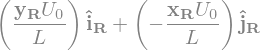

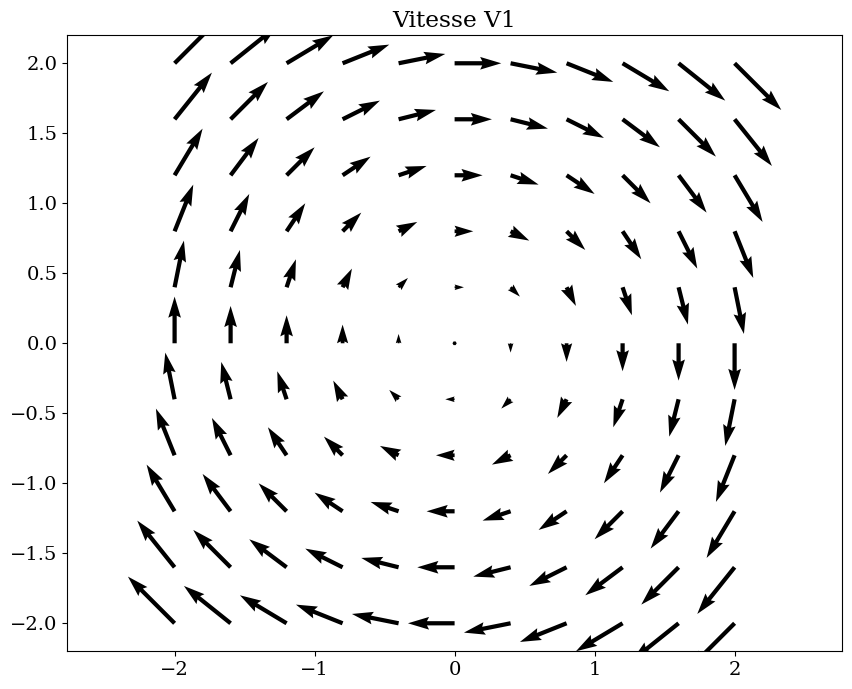

In [32]:
V1 = U0/L*(y*R.i - x*R.j)
display(V1)
plt.figure(figsize=(10,8))
trace_vecteur(V1.subs(vals),R,"Vitesse V1") 

'V1='

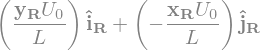

'divergence de V='

'rotationnel de V='

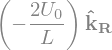

Champ conservatif: False
Champ solenoidal: True


In [33]:
# calcul la divergence et le rotationnel, test si conservatif et solenoidal
### BEGIN SOLUTION
V1 = (U0/L)*(y*R.i - x*R.j)
display("V1=",V1)
display("divergence de V=",sv.divergence(V1))
display("rotationnel de V=",sv.curl(V1))
print("Champ conservatif:",sv.is_conservative(V1))
print("Champ solenoidal:",sv.is_solenoidal(V1))
### END SOLUTION

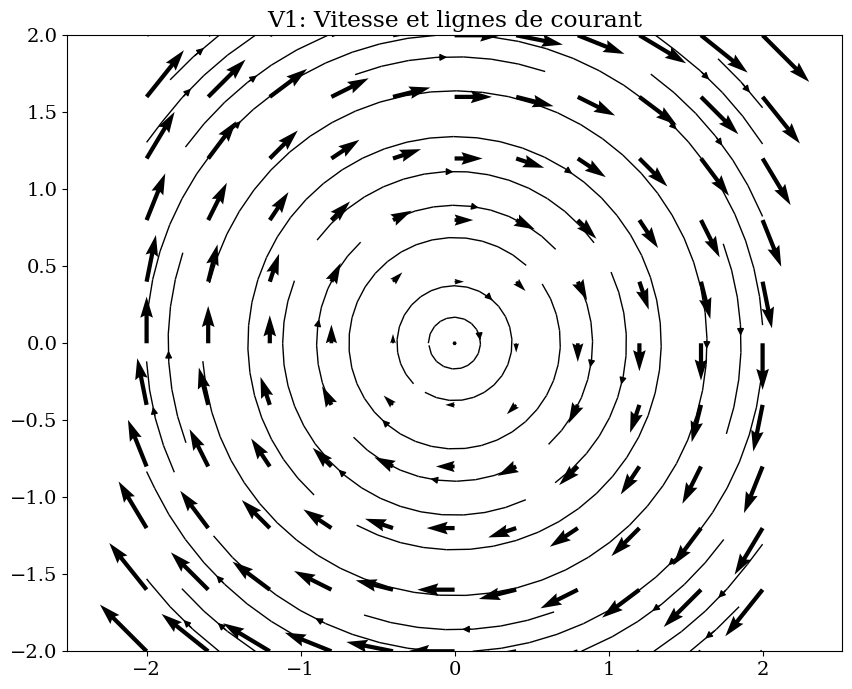

In [34]:
plt.figure(figsize=(10,8))
trace_vecteur(V1.subs(vals),R,"V1: Vitesse et lignes de courant")
trace_lignes(V1.subs(vals),R)

### Champ V2

$$ \vec{V_2} = U_0 [ \sin(\frac{x}{L}), \sin(\frac{y}{L})] $$


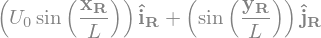

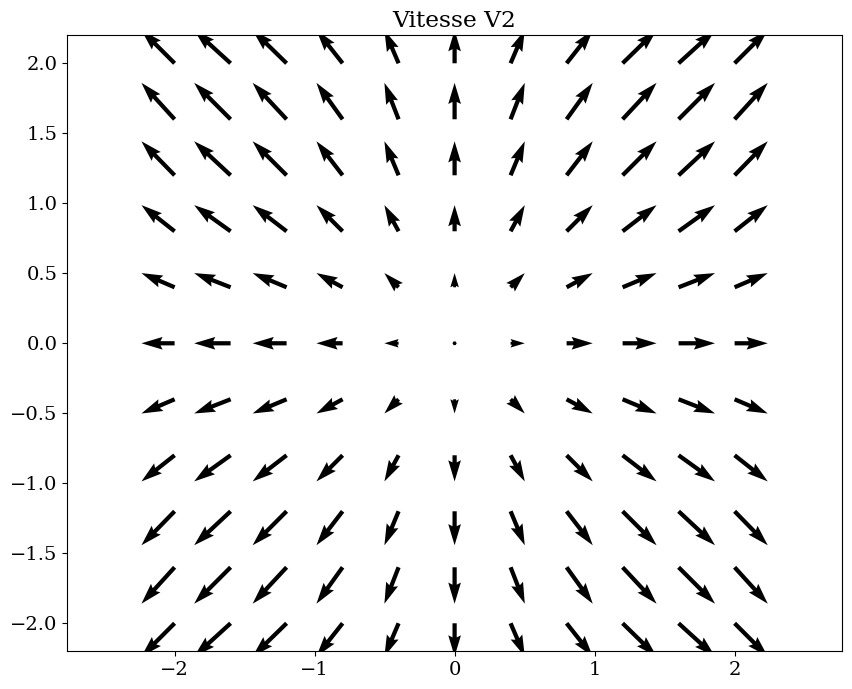

In [35]:
V2 = U0*sp.sin(x/L)*R.i + sp.sin(y/L)*R.j
display(V2)
plt.figure(figsize=(10,8))
trace_vecteur(V2.subs(vals),R,"Vitesse V2")

'V2='

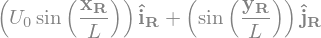

'divergence de V='

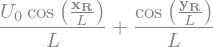

'rotationnel de V='

Champ conservatif: True
Champ solenoidal: False


'potentiel psi='

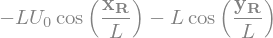

In [36]:

# calcul la divergence et le rotationnel, test si conservatif et solenoidal
### BEGIN SOLUTION
V2 = U0*sp.sin(x/L)*R.i + sp.sin(y/L)*R.j
display("V2=",V2)
display("divergence de V=",sv.divergence(V2))
display("rotationnel de V=",sv.curl(V2))
print("Champ conservatif:",sv.is_conservative(V2))
print("Champ solenoidal:",sv.is_solenoidal(V2))
psi = sv.scalar_potential(V2,R)
display("potentiel psi=",psi)
### END SOLUTION

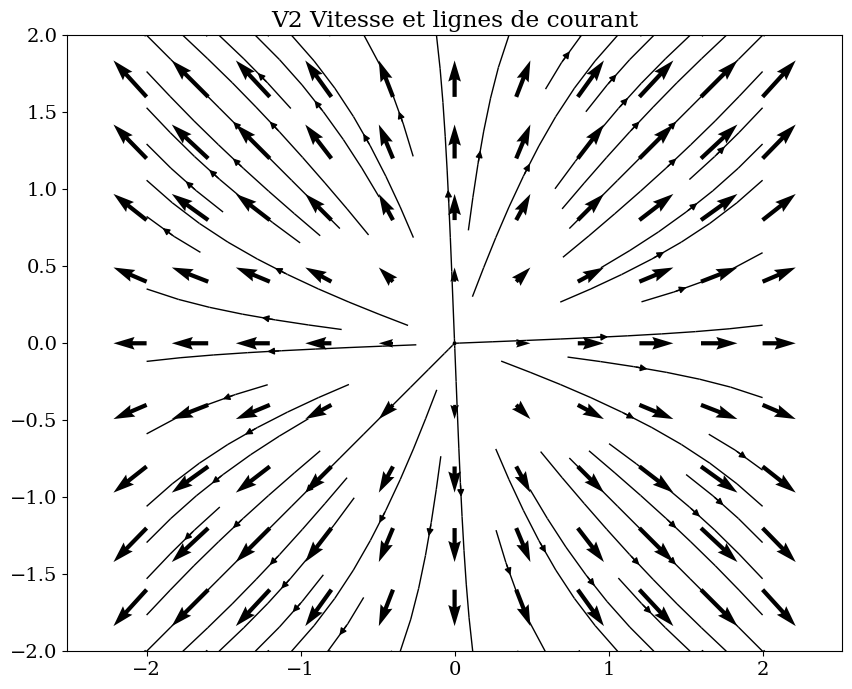

In [37]:
plt.figure(figsize=(10,8))
trace_vecteur(V2.subs(vals),R,"V2 Vitesse et lignes de courant")
trace_lignes(V2.subs(vals),R)

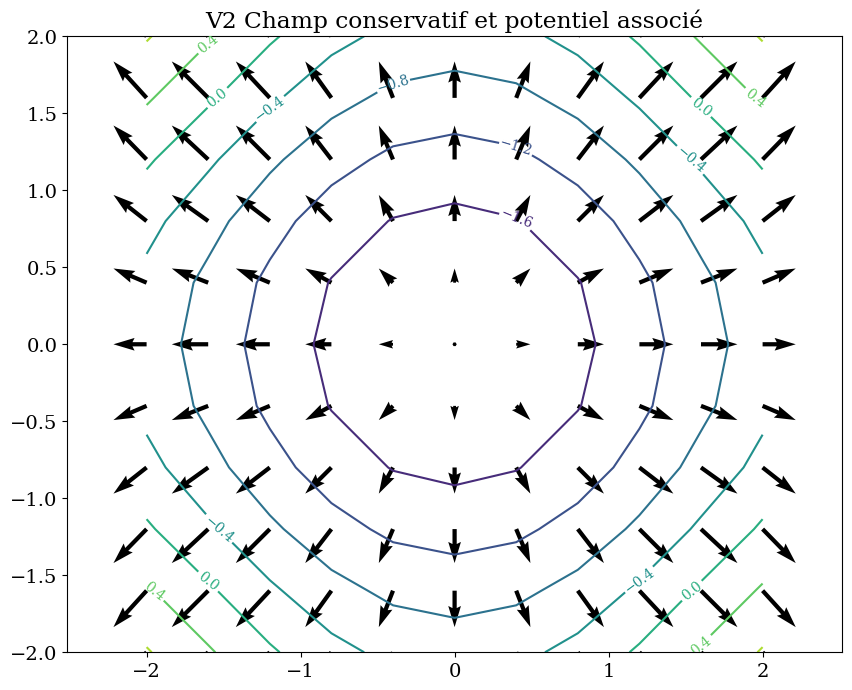

In [38]:
plt.figure(figsize=(10,8))
trace_isovaleur(psi.subs(vals),R,"V2 Champ conservatif et potentiel associé")
trace_vecteur(V2.subs(vals),R)

## Calcul des trajectoires

On suppose le champ stationnaire. La trajectoire $x_p(t),y_p(t)$ d'une particule vérifie:

$$  \frac{d x_p}{dt} = u(x_p(t),y_p(t)) \mbox{ et } \frac{d y_p}{dt} = v(x_p(t),y_p(t)) $$

avec une CI, on se ramène donc à résoudre un système de 2 EDO 
$$ \dot{Y} = F(Y,t)  \mbox{ avec } Y(0) = Y_0$$

que l'on va résoudre numériquement

### application: suivie d'une particule de taille finie

**objectif** calcul de la variation de volume de la particule

On va ensuite estimer la variation de volume d'une particule, en prenant un petit carré ABCD autour d'un point P et en calculant les trajectoires des 4 points.

On calculera ensuite numériquement la variation relative de volume de la particule, que l'on comparera à la divergence.

$$ \frac{1}{V}\frac{dV}{dt}$$ 


### Champ V1

$$ \vec{V_1} = \frac{U_0}{L}[ y, -x] $$


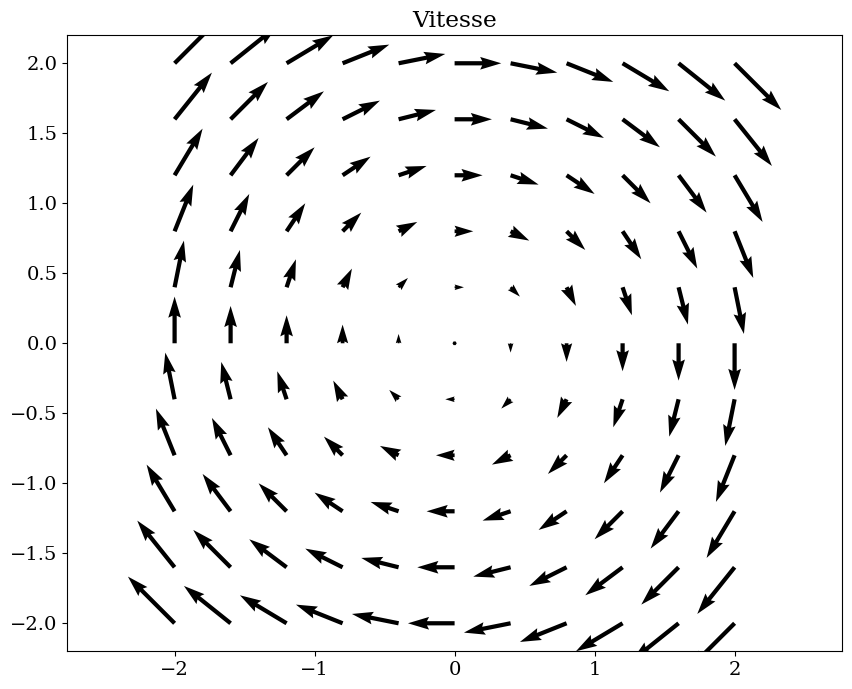

In [39]:
V1 = U0/L*(y*R.i - x*R.j)
plt.figure(figsize=(10,8))
trace_vecteur(V1.subs(vals),R,"Vitesse") 

In [41]:
# calcul de la trajectoire des 4 points du carre centre en P de cote 2h pour le champ V1
P = np.array([1.2,0.8])
h = 0.1
TA1, TB1, TC1, TD1, TP1 = 0,0,0,0,0
tt = [0.,0.05,0.2,0.5]
### BEGIN SOLUTION
A = P + [-h,-h]
B = P + [+h,-h]
C = P + [+h,+h]
D = P + [-h,+h]
TA1 = trajectoire(V1.subs(vals),R,A,tt)
TB1 = trajectoire(V1.subs(vals),R,B,tt)
TC1 = trajectoire(V1.subs(vals),R,C,tt)
TD1 = trajectoire(V1.subs(vals),R,D,tt)
TP1 = trajectoire(V1.subs(vals),R,P,tt)
### END SOLUTION

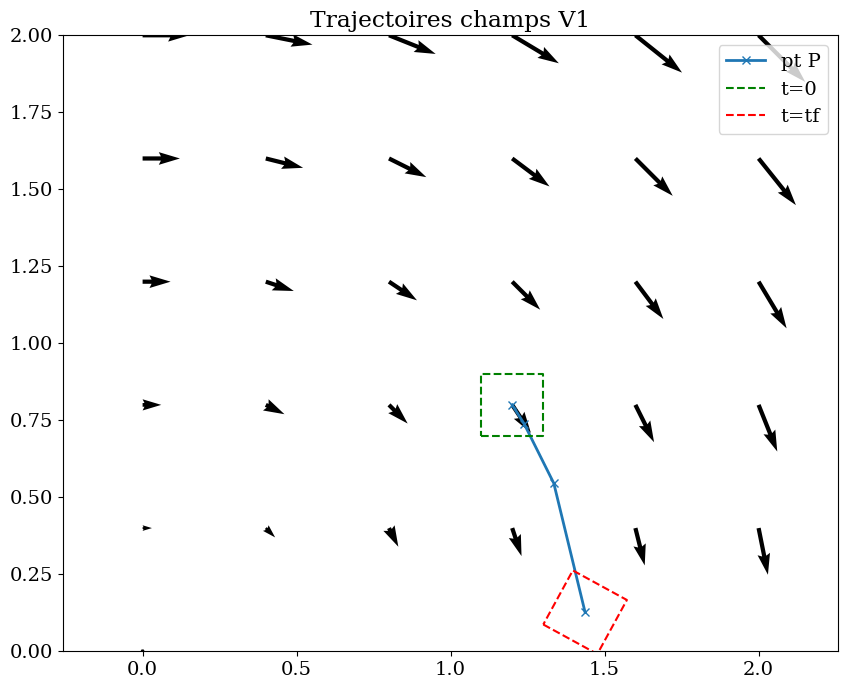

In [42]:
fig = plt.figure(figsize=(10,8))
trace_vecteur(V1.subs(vals),R)
plt.plot(TP1[:,0],TP1[:,1],'-x',label='pt P',lw=2)
plt.plot([TA1[0,0],TB1[0,0],TC1[0,0],TD1[0,0],TA1[0,0]], 
         [TA1[0,1],TB1[0,1],TC1[0,1],TD1[0,1],TA1[0,1]],'--g',label='t=0')
plt.plot([TA1[-1,0],TB1[-1,0],TC1[-1,0],TD1[-1,0],TA1[-1,0]],
         [TA1[-1,1],TB1[-1,1],TC1[-1,1],TD1[-1,1],TA1[-1,1]],'--r',label='t=tf')
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Trajectoires champs V1")
plt.legend();

In [43]:
# calcul du volume au temp tt[1]
volume1 = 0
dV1 = 0
# fonction calcul du volume a l'instant tt[i]
volume1 = lambda i: np.sqrt(((TB1[i,0]-TA1[i,0])**2+(TB1[i,1]-TA1[i,1])**2)*
                            ((TC1[i,0]-TB1[i,0])**2+(TC1[i,1]-TB1[i,1])**2))
# d'ou la variation de volume: 1/V dV/dt
dV1 = (volume1(1)-volume1(0))/volume1(0)/tt[1]
print("Volume = {:.4f} -> {:.4f}".format(volume1(0),volume1(1)))
print("Variation relative de volume= {:.2f}".format(dV1))
print("Divergence en P= {:.2f}".format(float(sv.divergence(V1))))

Volume = 0.0400 -> 0.0400
Variation relative de volume= 0.00
Divergence en P= 0.00


### Champ V2

$$ \vec{V_2} = U_0 [ \sin(\frac{x}{L}), \sin(\frac{y}{L})] $$


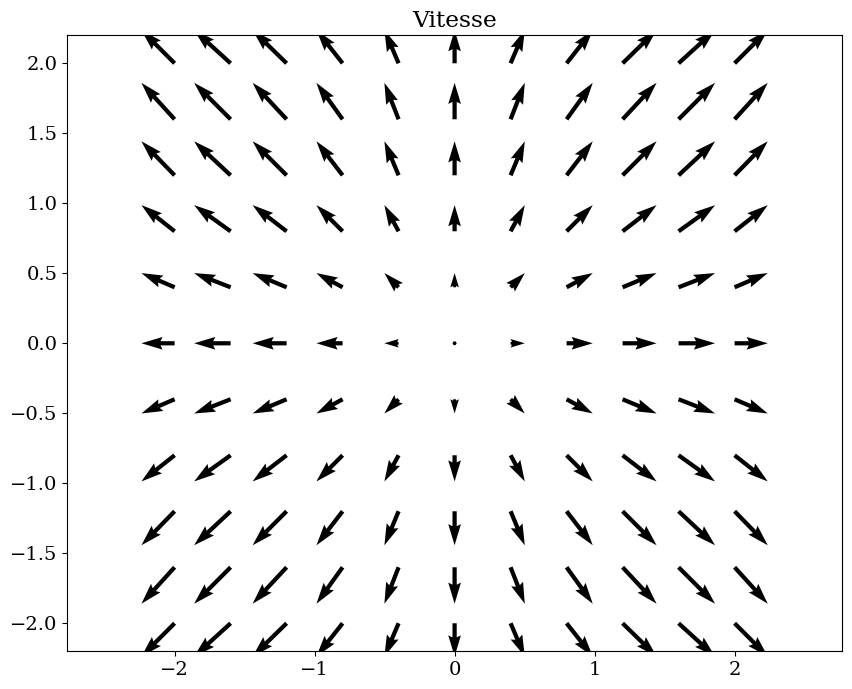

In [56]:
V2 = U0*(sp.sin(x/L)*R.i + sp.sin(y/L)*R.j)
plt.figure(figsize=(10,8))
trace_vecteur(V2.subs(vals),R,"Vitesse")

In [57]:
# calcul de la trajectoire des 4 points du carre centre en P de cote 2h pour le champ V2
TA2, TB2, TC2, TD2 = 0,0,0,0
tt = [0.,0.05,0.2,0.5]
### BEGIN SOLUTION
TA2 = trajectoire(V2.subs(vals),R,A,tt)
TB2 = trajectoire(V2.subs(vals),R,B,tt)
TC2 = trajectoire(V2.subs(vals),R,C,tt)
TD2 = trajectoire(V2.subs(vals),R,D,tt)
TP2 = trajectoire(V2.subs(vals),R,P,tt)
### END SOLUTION

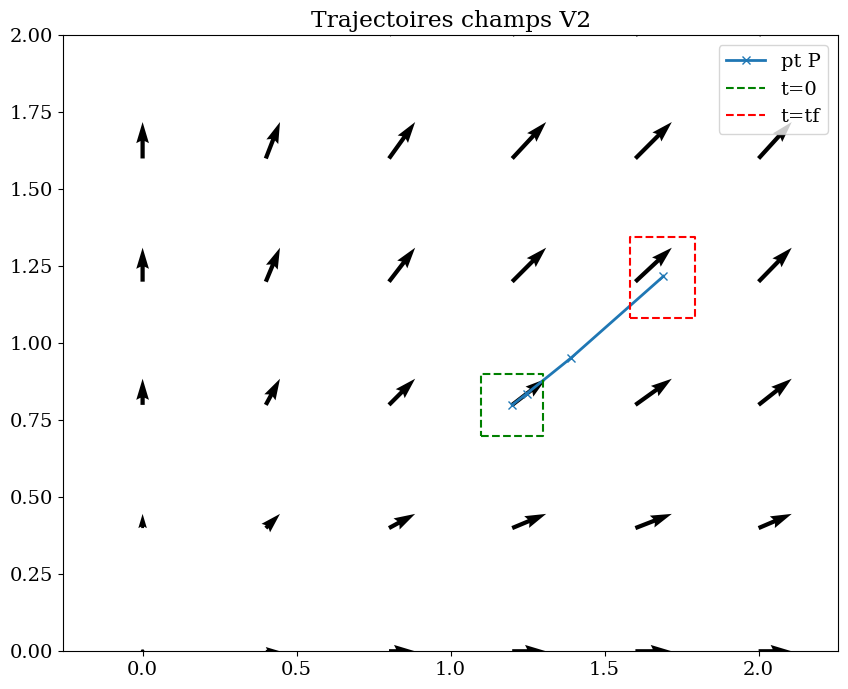

In [58]:
fig = plt.figure(figsize=(10,8))
trace_vecteur(V2.subs(vals),R)
plt.plot(TP2[:,0],TP2[:,1],'-x',label='pt P',lw=2)
plt.plot([TA2[0,0],TB2[0,0],TC2[0,0],TD2[0,0],TA2[0,0]], 
         [TA2[0,1],TB2[0,1],TC2[0,1],TD2[0,1],TA2[0,1]],'--g',label='t=0')
plt.plot([TA2[-1,0],TB2[-1,0],TC2[-1,0],TD2[-1,0],TA2[-1,0]],
         [TA2[-1,1],TB2[-1,1],TC2[-1,1],TD2[-1,1],TA2[-1,1]],'--r',label='t=tf')
plt.xlim(0,2)
plt.ylim(0,2)
plt.title("Trajectoires champs V2")
plt.legend();

In [59]:
### calcul du volume au temp tt[1]
dV2 = 0
volume2 = 0
# calcul du volume a l'instant tt[i]
volume2 = lambda i: np.sqrt(((TB2[i,0]-TA2[i,0])**2+(TB2[i,1]-TA2[i,1])**2)*
                            ((TC2[i,0]-TB2[i,0])**2+(TC2[i,1]-TB2[i,1])**2))
# d'ou la variation de volume: 1/V dV/dt
dV2 = (volume2(1)-volume2(0))/volume2(0)/tt[1]
print("Volume = {:.4f} -> {:.4f}".format(volume2(0),volume2(1)))
print("Variation relative de volume= {:.2f}".format(dV2))
print("Divergence en P= {:.2f}".format(sv.divergence(V2).subs(vals).subs([(R.x,TP2[0,0]),(R.y,TP2[0,1])])))

Volume = 0.0400 -> 0.0421
Variation relative de volume= 1.05
Divergence en P= 1.06


## Mouvement d'une particule dans un champ

Pour analyser le mouvement, on va calculer l'évolution du champ de vitesse entre 2 points M et M' :

\begin{equation}
\overrightarrow{U}_{M'}=\overrightarrow{U}_{M}+\overline{\overline{grad}}(\overrightarrow{U})\,\overrightarrow{MM'}
\end{equation}

En décomposant le gradient de vitesse en une partie symétrique $\overline{\overline{D}} \; \overrightarrow{MM'}$ et antisymétrique $\overrightarrow{\Omega}\wedge\overrightarrow{MM'}$

\begin{equation}
\overrightarrow{U}_{M'}=\underbrace{\overrightarrow{U}_{M}}_{\mbox{translation}}+\underbrace{\overrightarrow{\Omega}\wedge\overrightarrow{MM'}}_{\mbox{rotation}}+\underbrace{\overline{\overline{D}} \; \overrightarrow{MM'}}_{\mbox{déformation}}
\end{equation}


 où $\overrightarrow{\Omega}=\frac{1}{2}\overrightarrow{rot}\,\overrightarrow{U}$
est le vecteur tourbillon et $\overline{\overline{D}} \; \overrightarrow{MM'}$ la vitesse de déformation


On écrit une fonction `Gradient(v)` qui calcule la matrice gradient du champ V

Pour chaque champ:

 - calcule le gradient
 - calcule la vorticité $\Omega$
 - calcule la matrice de déformation $D$

In [60]:
def Gradient(v):
    '''calcul matrice gradient du champ de vecteurs v'''
    dv1 = sv.gradient(v.dot(R.i))
    dv2 = sv.gradient(v.dot(R.j))
    dv  = sp.Matrix([[dv1.dot(R.i),dv1.dot(R.j)],[dv2.dot(R.i),dv2.dot(R.j)]])
    return dv

'Grad V1='

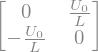

'Grad V2='

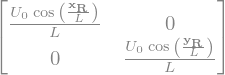

In [61]:
# calcul du gradient de V1 et V2
GradV1 = 0
GradV2 = 0
### BEGIN SOLUTION
GradV2=Gradient(V2)
GradV1=Gradient(V1)
display("Grad V1=",GradV1)
display("Grad V2=",GradV2)
### END SOLUTION

'Omega1='

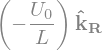

'Omega2='

In [62]:
# calcul de la vorticité de V1 et V2
Omega1 = 0
Omega2 = 0
### BEGIN SOLUTION
Omega1 = sv.curl(V1)/2
Omega2 = sv.curl(V2)/2
display("Omega1=",Omega1)
display("Omega2=",Omega2)
### END SOLUTION

'D1='

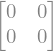

'D2='

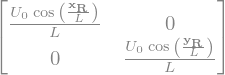

In [63]:
# calcul de la matrice de déformation
D1 = 0
D2 = 0
### BEGIN SOLUTION
D1 = (GradV1+GradV1.transpose())/2
D2 = (GradV2+GradV2.transpose())/2
display("D1=",D1)
display("D2=",D2)
### END SOLUTION

## Trajectoires d'une particule

- Tracer les trajectoires des points A,B,C et D partant du meme point P avec les 2 champs

- Analyser le résultat

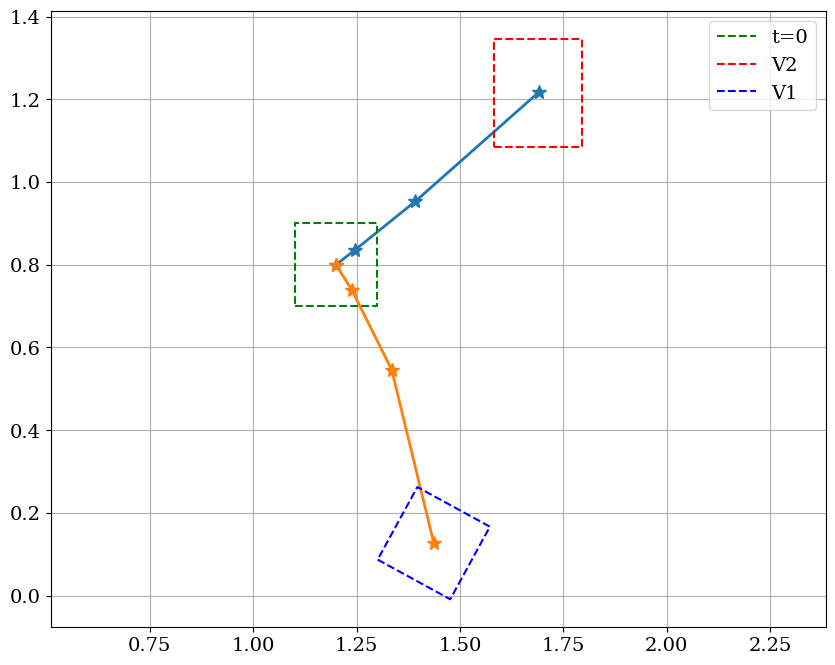

In [64]:
plt.figure(figsize=(10,8))
plt.plot(TP2[:,0],TP2[:,1],'-*',lw=2,ms=10)
plt.plot(TP1[:,0],TP1[:,1],'-*',lw=2,ms=10)

plt.plot([TA2[0,0],TB2[0,0],TC2[0,0],TD2[0,0],TA2[0,0]], 
         [TA2[0,1],TB2[0,1],TC2[0,1],TD2[0,1],TA2[0,1]],'--g',label='t=0')
plt.plot([TA2[-1,0],TB2[-1,0],TC2[-1,0],TD2[-1,0],TA2[-1,0]],
         [TA2[-1,1],TB2[-1,1],TC2[-1,1],TD2[-1,1],TA2[-1,1]],'--r',label='V2')
plt.plot([TA1[-1,0],TB1[-1,0],TC1[-1,0],TD1[-1,0],TA1[-1,0]],
         [TA1[-1,1],TB1[-1,1],TC1[-1,1],TD1[-1,1],TA1[-1,1]],'--b',label='V1')
plt.legend()
plt.grid('on')
plt.axis('equal');

## FIN